In [1]:
import sys, os
sys.path.append(os.pardir)
import time
import matplotlib.pyplot as plt
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

In [2]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [3]:
# 수치 미분 때와 동일하게
iters_num = 1000 
train_size = x_train.shape[0]
batch_size = 500  # 실제 코드 : 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = train_size // batch_size
print('iter_per_epoch =', iter_per_epoch)
print('epochs =', iters_num // iter_per_epoch 
      if iters_num % iter_per_epoch == 0 else iters_num // iter_per_epoch + 1)

iter_per_epoch = 120
epochs = 9


In [4]:
# train
start_time = time.time()
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch) # backpropagation
    
    for key in ('W1', 'b1', 'W2', 'b1'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    if i % iter_per_epoch == 0 or i == iters_num-1:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('%d iter train acc, test acc : %.4f, %.4f' 
              % (i, train_acc, test_acc))
        print('%d iteration time = %.2f sec' % (i, time.time() - start_time))

0 iter train acc, test acc : 0.0437, 0.0411
0 iteration time = 0.48 sec
120 iter train acc, test acc : 0.7676, 0.7760
120 iteration time = 2.00 sec
240 iter train acc, test acc : 0.8686, 0.8741
240 iteration time = 3.50 sec
360 iter train acc, test acc : 0.8902, 0.8949
360 iteration time = 5.01 sec
480 iter train acc, test acc : 0.9000, 0.9036
480 iteration time = 6.48 sec
600 iter train acc, test acc : 0.9072, 0.9093
600 iteration time = 7.97 sec
720 iter train acc, test acc : 0.9110, 0.9161
720 iteration time = 9.45 sec
840 iter train acc, test acc : 0.9148, 0.9163
840 iteration time = 10.94 sec
960 iter train acc, test acc : 0.9183, 0.9196
960 iteration time = 12.43 sec
999 iter train acc, test acc : 0.9191, 0.9200
999 iteration time = 13.22 sec


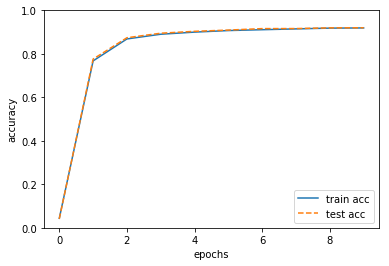

In [5]:
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()